In [8]:
import sys
import os
import xarray as xr
import matplotlib.pyplot as plt
sys.path.append(os.path.join(os.environ['HOME'], 'Isca'))    # So can access functions in isca_tools which is in home/Isca directory
import isca_tools
import numpy as np
from isca_tools.utils import area_weighting
from isca_tools.plot import plot_spin_up

In [25]:
# Load dataset
exp_name = f'rossbypalooza/depth=20/spin_up/'
exp_name = f'rossbypalooza/dry/depth=20/lat=10_kappa=0_6/bucket/'
ds = isca_tools.load_dataset(exp_name)
namelist = isca_tools.load_namelist(exp_name)  # Need this for albedo_value
albedo = namelist['mixed_layer_nml']['albedo_value']
tau_sw = namelist['two_stream_gray_rad_nml']['atm_abs']

/Users/joshduffield/Documents/StAndrews/Isca/isca_tools/utils/load.py:52: UserWarning: First month saved is 121 not 1.
  warnings.warn(f'First month saved is {first_month} not 1.')


In [26]:
# Include surface albedo which reflects all SW radiation reaching it
# SW radiation reaching it has been reduced by that absorbed in the atmosphere - non zero short wave optical depth.
# There is no absorption on return trip from surface to space though hence just the one factor.
short_wave_net = ds.swdn_toa*(1-albedo*np.exp(-tau_sw))

In [27]:
n_years = 20
n_year_days = 360
ds_annual_mean = xr.concat([ds.sel(time=slice(i*n_year_days, (i+1)*n_year_days)).mean(dim='time', keepdims=True) for i in range(n_years)], dim='time')
short_wave_net = ds_annual_mean.swdn_toa*(1-albedo*np.exp(-tau_sw))

AttributeError: 'DataArray' object has no attribute 'units'

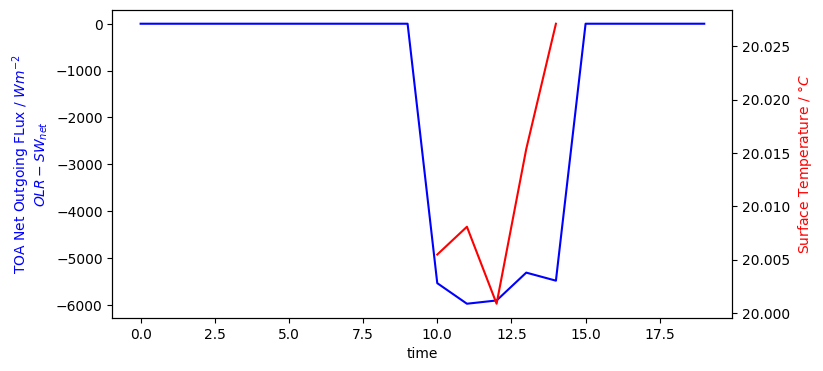

In [28]:
# Plot spinup time for each depth value
fig, ax = plt.subplots(1,1, figsize=(8, 4))
ax.set_xlabel('time [years]')
plot_spin_up(ds_annual_mean.olr, short_wave_net, ds_annual_mean.t_surf, ax)